<a href="https://colab.research.google.com/github/Sarkis55/CA03--Decision-Tree_Census_Data/blob/main/CA03_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Libaries for Preprocessing and DQA
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

#Libraries needed for training, testing and evaluating decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

#Libraries needed for visualizing best decision tree model
from sklearn.tree import plot_tree


In [3]:
#Retrieving data and loading them into dataframe
csv_url = 'https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true'
df = pd.read_csv(csv_url)

display(df.head())

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [4]:
df.shape

(48842, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [6]:
#Checking for Missing Data
df.isnull().sum()

,0
hours_per_week_bin,0
occupation_bin,0
msr_bin,0
capital_gl_bin,0
race_sex_bin,0
education_num_bin,0
education_bin,0
workclass_bin,0
age_bin,0
flag,0


In [7]:
#Getting a value count for each column
for col in df.columns:
  print(f"Value counts for column: {col}")
  print(df[col].value_counts())
  print("\n")

Value counts for column: hours_per_week_bin
hours_per_week_bin
b. 31-40            26639
d. 41-50 & 61-70     9819
a. 0-30              7851
e. 51-60             3759
c. 71-100             774
Name: count, dtype: int64


Value counts for column: occupation_bin
occupation_bin
c. Mid - Mid     13971
b. Mid - Low     12947
e. High          12258
a. Low            7237
d. Mid - High     2429
Name: count, dtype: int64


Value counts for column: msr_bin
msr_bin
c. High    22047
b. Mid     15868
a. Low     10927
Name: count, dtype: int64


Value counts for column: capital_gl_bin
capital_gl_bin
a. = 0    42525
c. > 0     4035
b. < 0     2282
Name: count, dtype: int64


Value counts for column: race_sex_bin
race_sex_bin
c. High    29737
b. Mid     16457
a. Low      2648
Name: count, dtype: int64


Value counts for column: education_num_bin
education_num_bin
b. 9-12    30324
c. 13       8025
a. 0-8      6408
d. 14       2657
e. 15+      1428
Name: count, dtype: int64


Value counts for column: e

In [8]:
#Discretizing features using label encoder.
#Since the majority of the values are object we use encoder to reprsent each value as an integer.

LE = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
      df[col] = LE.fit_transform(df[col])

print("DataFrame after encoding all object columns:")
display(df.head())

#Source: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

DataFrame after encoding all object columns:


,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,1,1,1,2,2,2,2,1,3,1,0
1,0,4,2,0,2,2,2,1,4,1,0
2,1,0,1,0,2,1,1,1,3,1,0
3,1,0,2,0,1,0,0,1,4,1,0
4,1,4,2,0,0,2,2,1,1,1,0


In [9]:
#Getting a value count for each column after encoding
for col in df.columns:
  print(f"Value counts for column: {col}")
  print(df[col].value_counts())
  print("\n")

Value counts for column: hours_per_week_bin
hours_per_week_bin
1    26639
3     9819
0     7851
4     3759
2      774
Name: count, dtype: int64


Value counts for column: occupation_bin
occupation_bin
2    13971
1    12947
4    12258
0     7237
3     2429
Name: count, dtype: int64


Value counts for column: msr_bin
msr_bin
2    22047
1    15868
0    10927
Name: count, dtype: int64


Value counts for column: capital_gl_bin
capital_gl_bin
0    42525
2     4035
1     2282
Name: count, dtype: int64


Value counts for column: race_sex_bin
race_sex_bin
2    29737
1    16457
0     2648
Name: count, dtype: int64


Value counts for column: education_num_bin
education_num_bin
1    30324
2     8025
0     6408
3     2657
4     1428
Name: count, dtype: int64


Value counts for column: education_bin
education_bin
1    30324
2     8025
0     6408
3     2657
4     1428
Name: count, dtype: int64


Value counts for column: workclass_bin
workclass_bin
1    46012
0     2830
Name: count, dtype: int64


Val

<Axes: >

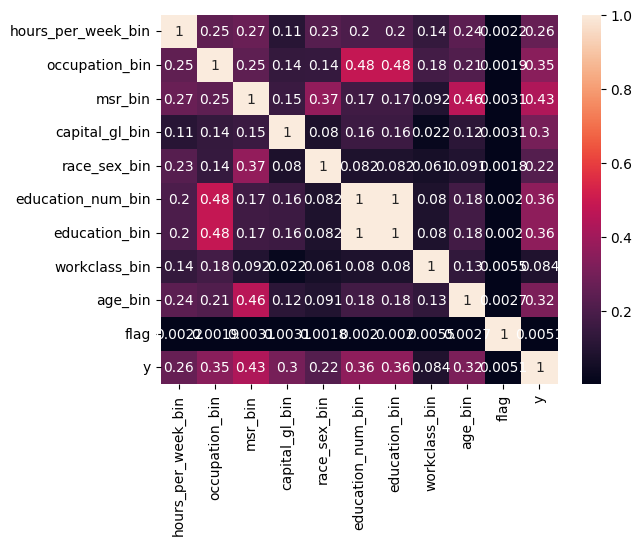

In [10]:
#Heatmap to see feature coorelation
sns.heatmap(df.corr(), annot=True)

In [11]:
#dropping education_bin since it is essentially the same as education_num_bin
df = df.drop('education_bin', axis=1)

In [12]:
#Since we have a column that labels what rows are training and testing, we manually split them by creating two separate dataframes.

#Whatever that is labeled "train" goes to the training dataframe and same for testing
train_df = df[df['flag'] == 1]
test_df = df[df['flag'] == 0]

In [13]:
# Separate the features (X) and target (y).
# We then drop the "flag" column so that the model doesn't cheat by associating a pattern based on a speciifc value
X_train = train_df.drop(['y', 'flag'], axis=1)
y_train = train_df['y']

X_test = test_df.drop(['y', 'flag'], axis=1)
y_test = test_df['y']

#Code generated by Gemini

In [14]:
#Since there is a class imbalance among the target, y, we want to even it out by oversampling
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE with a fixed random_state for reproducibility
sm = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

### Finding the "Best Tree"

In [15]:
#Finding best max_depth parameter of the decision tree

result = []
max_depth_options = [2,4,6,8,10,12,14,16,18,10]

for trees in max_depth_options:
  model = DecisionTreeClassifier(max_depth=trees,random_state=101)
  model.fit(X_train_resampled, y_train_resampled)
  y_pred = model.predict(X_test)
  accuracy = np.mean(y_test == y_pred)
  result.append(accuracy)

for x, (depth, num) in enumerate(zip(max_depth_options, result)):
  print(f"Depth: {depth}, Accuracy: {num}")

Depth: 2, Accuracy: 0.7186904981266506
Depth: 4, Accuracy: 0.750629568208341
Depth: 6, Accuracy: 0.7878508691112339
Depth: 8, Accuracy: 0.801486395184571
Depth: 10, Accuracy: 0.7954056876113261
Depth: 12, Accuracy: 0.7914747251397334
Depth: 14, Accuracy: 0.7911061974080216
Depth: 16, Accuracy: 0.7928259934893435
Depth: 18, Accuracy: 0.7920275167373011
Depth: 10, Accuracy: 0.7954056876113261


In [16]:
#Checking which criterian gives the best tree

result = []
criterian_options = ['entropy', 'gini']

for trees in criterian_options:
  model = DecisionTreeClassifier(criterion=trees,random_state=101)
  model.fit(X_train_resampled, y_train_resampled)
  y_pred = model.predict(X_test)
  accuracy = np.mean(y_test == y_pred)
  result.append(accuracy)

for x, (crit, num) in enumerate(zip(criterian_options, result)):
  print(f"Criteria: {crit}, Accuracy: {num}")

Criteria: entropy, Accuracy: 0.7915975677169707
Criteria: gini, Accuracy: 0.7919046741600638


In [17]:
#Checking which max features gives the best tree
result = []
max_feat_options = [None, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

for trees in max_feat_options:
  model = DecisionTreeClassifier(max_features=trees,random_state=101)
  model.fit(X_train_resampled, y_train_resampled)
  y_pred = model.predict(X_test)
  accuracy = np.mean(y_test == y_pred)
  result.append(accuracy)

for x, (feat, num) in enumerate(zip(max_feat_options, result)):
  print(f"Feature: {feat}, Accuracy: {num}")

Feature: None, Accuracy: 0.7919046741600638
Feature: 0.3, Accuracy: 0.7933173637982925
Feature: 0.4, Accuracy: 0.7941158405503348
Feature: 0.5, Accuracy: 0.7931330999324366
Feature: 0.6, Accuracy: 0.7931330999324366
Feature: 0.7, Accuracy: 0.7944843682820466
Feature: 0.8, Accuracy: 0.7920889380259197


In [18]:
#Checking which min sample leaves gives the best tree
result = []
min_samp_options = [5,10,15,20,25,30,35,40]

for trees in min_samp_options:
  model = DecisionTreeClassifier(min_samples_leaf=trees,random_state=101)
  model.fit(X_train_resampled, y_train_resampled)
  y_pred = model.predict(X_test)
  accuracy = np.mean(y_test == y_pred)
  result.append(accuracy)

for x, (leaf, num) in enumerate(zip(min_samp_options, result)):
  print(f"Min_leaves: {leaf}, Accuracy: {num}")

Min_leaves: 5, Accuracy: 0.7944843682820466
Min_leaves: 10, Accuracy: 0.7939315766844789
Min_leaves: 15, Accuracy: 0.7952828450340889
Min_leaves: 20, Accuracy: 0.796941219826792
Min_leaves: 25, Accuracy: 0.797616854001597
Min_leaves: 30, Accuracy: 0.7957742153430379
Min_leaves: 35, Accuracy: 0.7960199004975125
Min_leaves: 40, Accuracy: 0.795098581168233


## Training and Testing the "Best" Decision Tree

In [19]:
#After doing all the checks, we then take the hyperparameter that gave the best result and built our "Best Tree"
import time

best_tree = DecisionTreeClassifier(criterion= 'gini', max_depth= 8, max_features= 0.4, min_samples_leaf= 25, random_state= 101)

#Checking time it takes to train model
start_time = time.time()

#Training Model
best_tree.fit(X_train_resampled, y_train_resampled)

end_time = time.time()
print(f"Training Time: {end_time - start_time} seconds")

#Loading in test data to predict vlaues
y_pred = best_tree.predict(X_test)

Training Time: 0.03429436683654785 seconds


In [20]:
#Creating classification report to evaluate model performance
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.77      0.85     12435
           1       0.53      0.85      0.65      3846

    accuracy                           0.79     16281
   macro avg       0.74      0.81      0.75     16281
weighted avg       0.85      0.79      0.80     16281



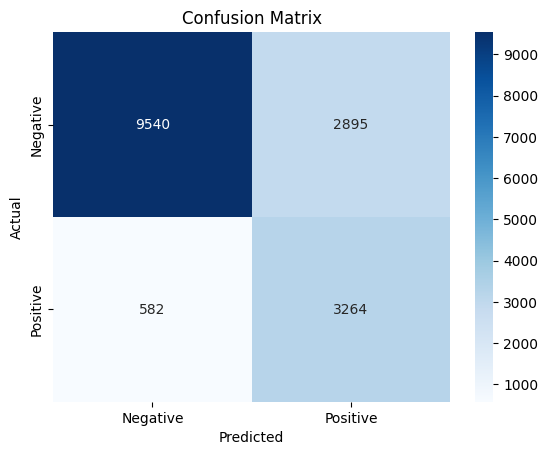

In [21]:
#Creating confusion matrix
cm = confusion_matrix(y_test, y_pred)

#Visualizing Confusion matrix using seaborne
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

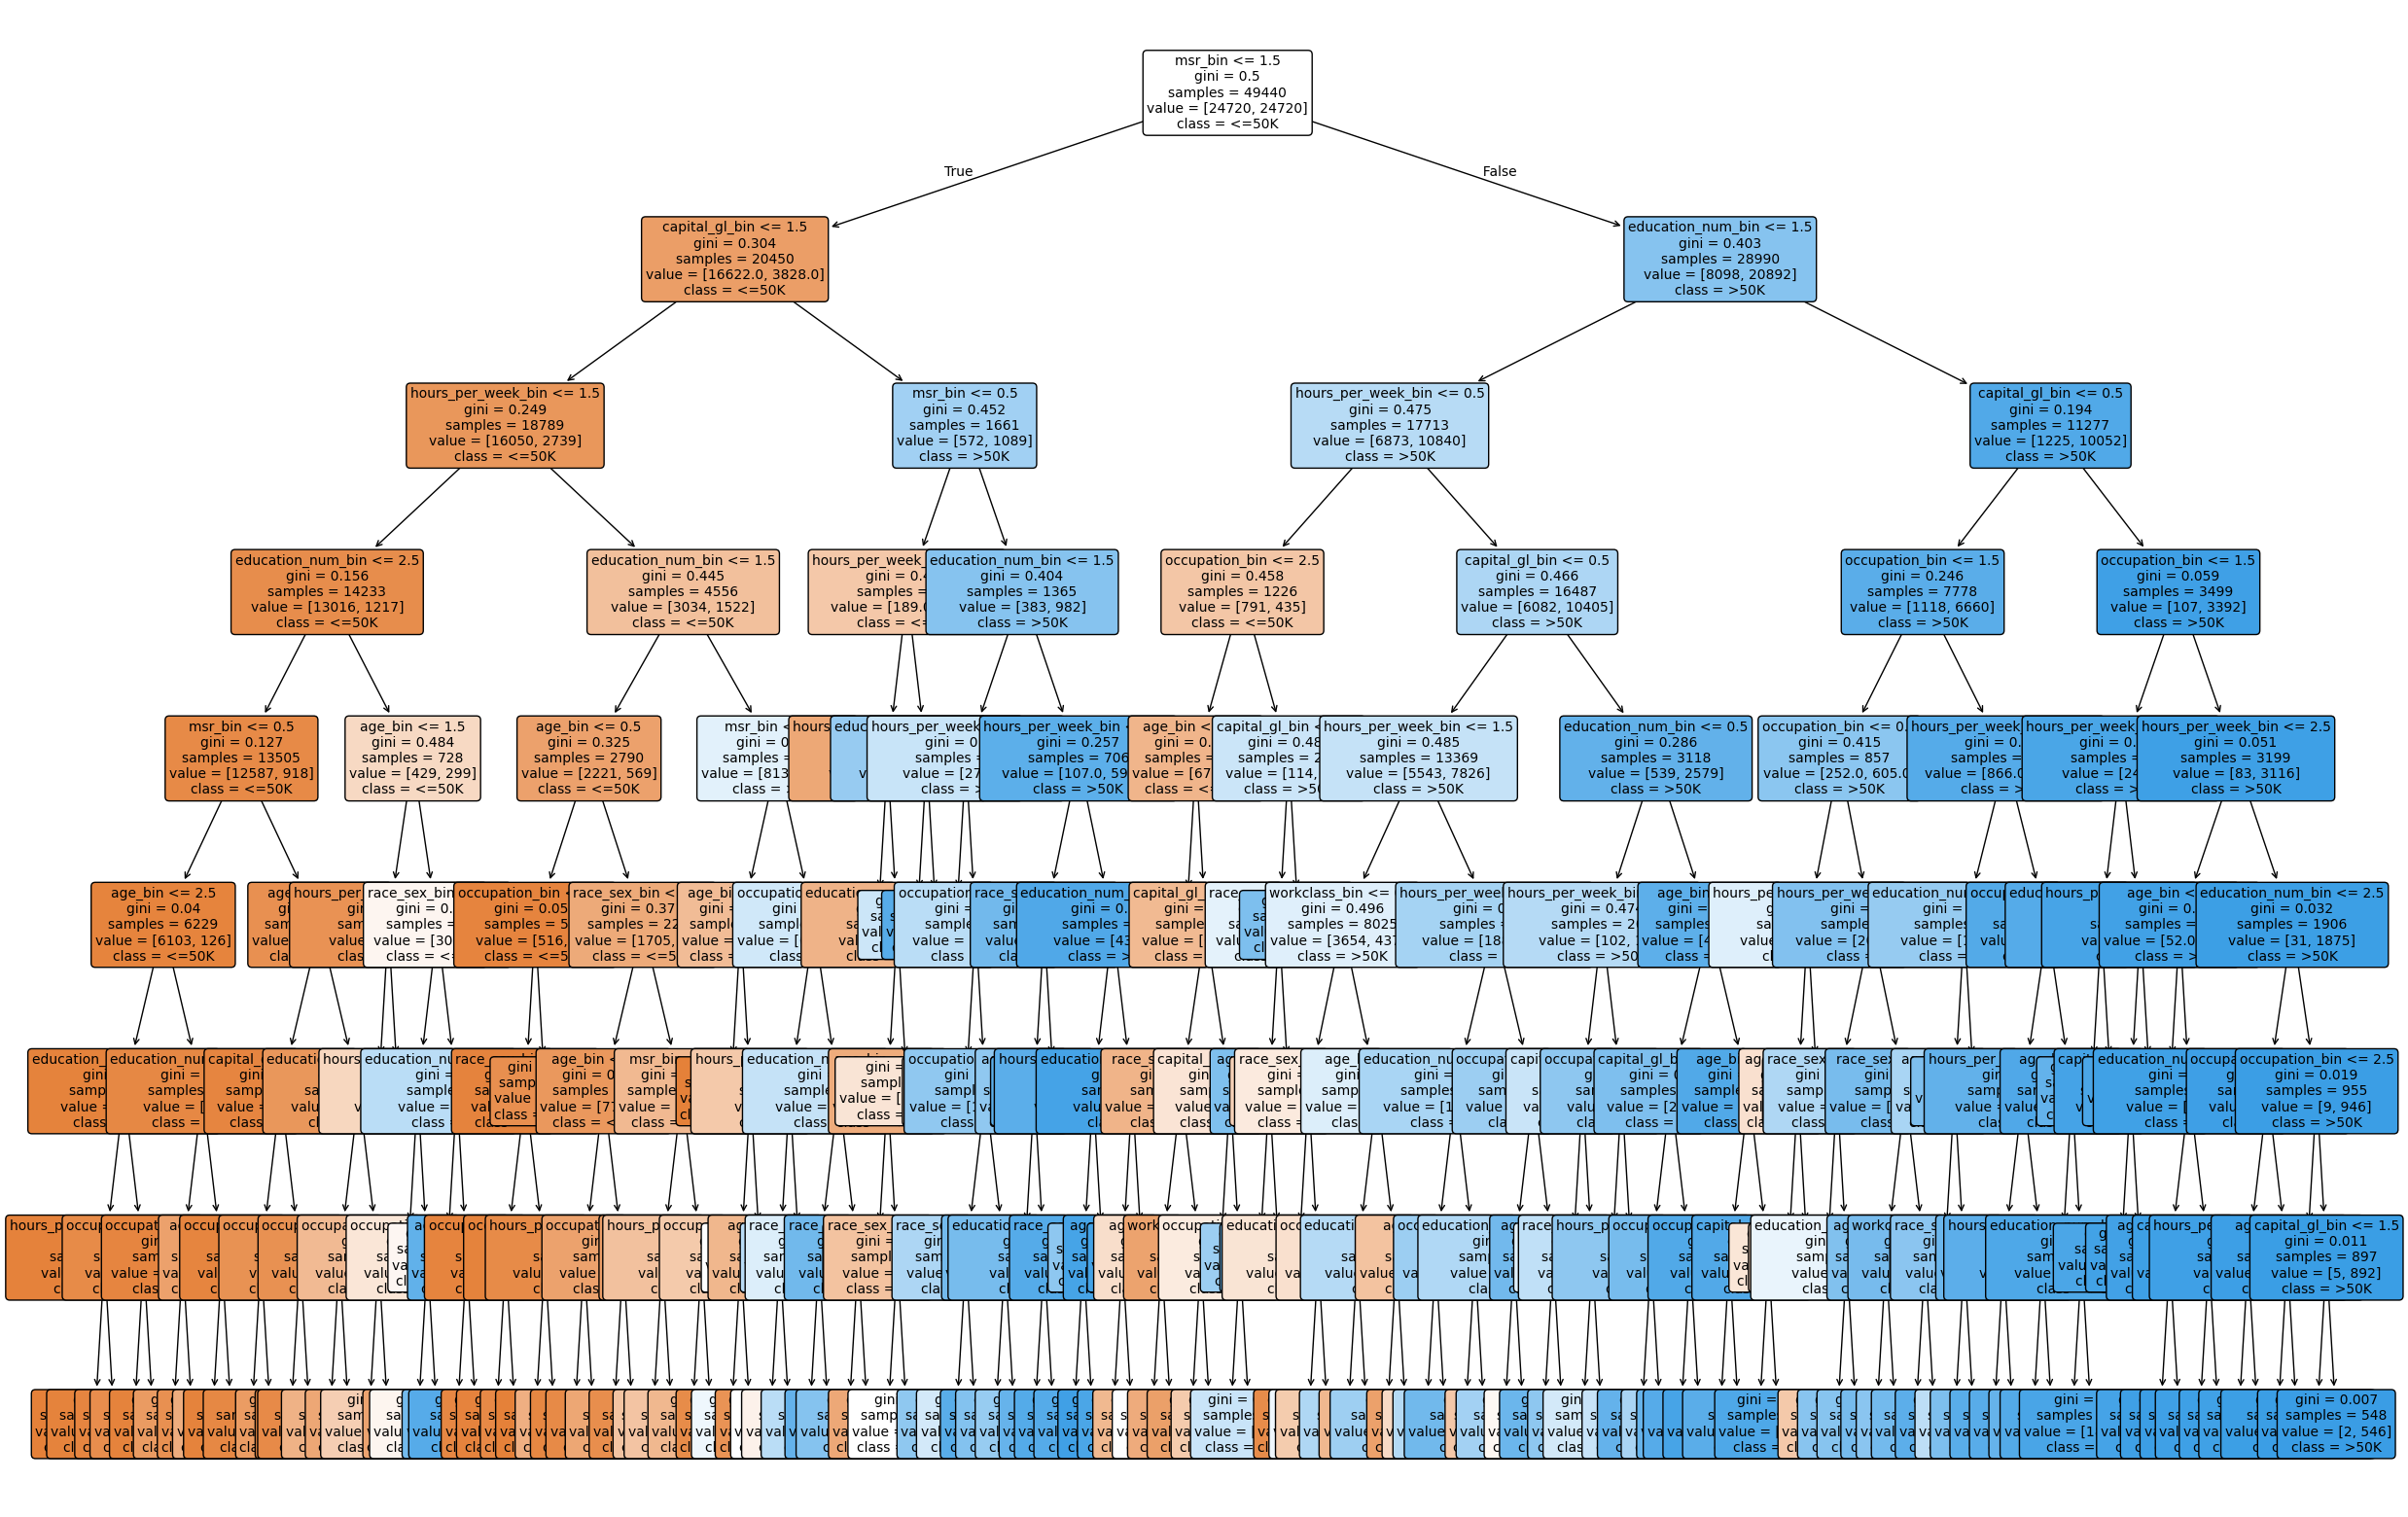

In [22]:
#Visualizing Decision Tree
plt.figure(figsize=(30,20))
plot_tree(best_tree,
          feature_names=X_train.columns,
          class_names=['<=50K', '>50K'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()

#Source: Gemini

In [25]:
X_train_resampled.columns

Index(['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'workclass_bin', 'age_bin'],
      dtype='object')

In [26]:
new_person = pd.DataFrame(columns=X_train_resampled.columns)
new_person.loc[0] = 0

In [33]:
new_person = pd.DataFrame(columns=X_train_resampled.columns)
new_person.loc[0] = 0

new_person.loc[0, "hours_per_week_bin"] = 48
new_person.loc[0, "age_bin"] = 58
new_person.loc[0, "education_num_bin"] = 12

new_person.loc[0, "occupation_bin"] = 1     # Mid-Low
new_person.loc[0, "msr_bin"] = 2            # High
new_person.loc[0, "race_sex_bin"] = 1       # Mid
new_person.loc[0, "workclass_bin"] = 1      # Income
new_person.loc[0, "capital_g_bin"] = 1      # Yes

new_person = new_person[X_train_resampled.columns]

pred = best_tree.predict(new_person)[0]
proba = best_tree.predict_proba(new_person)[0]
classes = best_tree.classes_

pred, classes, proba

pred_label = ">50K" if pred == 1 else "<=50K"
confidence = round(proba[list(classes).index(pred)] * 100, 2)

print("Prediction:", pred_label)
print("Confidence:", f"{confidence}%")

Prediction: >50K
Confidence: 76.47%


In [28]:
new_person = new_person[X_train_resampled.columns]

In [29]:
pred = best_tree.predict(new_person)[0]
proba = best_tree.predict_proba(new_person).max()

pred, proba

(np.int64(0), np.float64(0.5))

### Q.1: Why does it makes sense to discretize columns for this problem?
- It makes sense to discretize, the columns because most of the values within each feature captures a range of values. Therefore it would be better if we set an integer, that represent those range of values that the machine learning model can also train from.

### Q.2: What might be the issues (if any) if we DID NOT discretize the columns?
- The main two issues would be high computation cost and overfitting, since the tree will attempt to find the perfect split point among continous variables. Without, this also makes the model sensitive to outliars and noise in data.

### Q.3 Decision Tree Hyper-parameter variation vs. performance
- Based on the performance among different hyper-paramters, there wasn't really any drastic differences since the accuracy was around 0.79.

### Q.4 How long was your total run time to train the best model?
- It took 0.385 seconds to train the decision tree model.

### Q.5 Did you find the BEST TREE?
- Yes, based on the hyper-parameter tuning results, this tree performed the best. Other parameter combinations produced similar accuracy, but this one provided the best balance between performance and simplicity.

### Q.6 Write your observations from the visualization of the best tree
- The tree shows that marital status, education level, capital gain, hours worked per week, and occupation are the most influential features. Tree is not fully grown, which limits overfitting and keeps the model interpretable. Deeper splits are more specific and apply to fewer samples.


### Q.7 Will this Tree “overfit”?
- Risk of overfitting is always present with decision trees, but in this case it appears to be limited. The model does not grow too deep, and the accuracy remains consistent across different hyper-parameter settings.

### Q.8 What is the probability that your prediction for this person is correct?
-  The model’s predicted probability for the chosen class is 0.7647, so the prediction is correct with about 76.47% probability.